In [5]:
# packages
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [6]:
# Read the data
train_df = pd.read_csv(r'Downloads/train_u6lujuX_CVtuZ9i.csv')
test_df = pd.read_csv(r'Downloads/test_Y3wMUE5_7gLdaTN.csv')

In [7]:
# make a copy of original dataset to play with
train_df_original = train_df.copy()
test_df_original = test_df.copy()

In [8]:
# check the attributes in datasets
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
test_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

As we can see that test dataset is missing the 'loan status' attribute, have to predict it

In [10]:
# lets check what ration have they split the dataset into train and test
train_df.shape, test_df.shape

((614, 13), (367, 12))

Lets do the analysis, starting with Univariate analysis

In [11]:
# Check out the trarget variable 'Loan Status' frequency of each category in the variable
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
# lets normalize the counts
train_df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

around 69% of people are approved loan

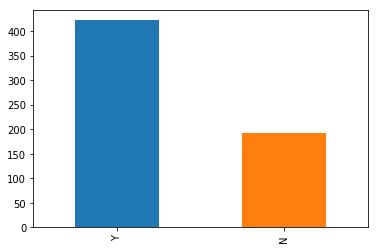

In [13]:
# lets create a bar plot to visualize the data
train_df['Loan_Status'].value_counts().plot.bar()

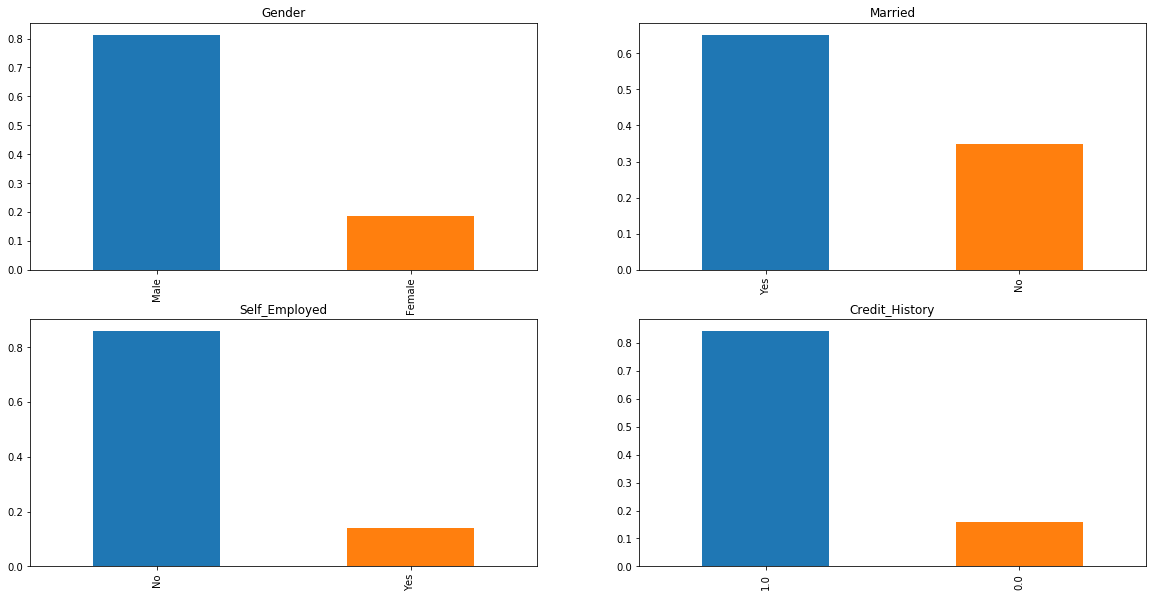

In [14]:
# visualize all variables (categorical, ordinal & numerical)
# cosidering 'categorical' values first
plt.figure(1)
plt.subplot(221)
train_df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
train_df['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')

plt.subplot(223)
train_df['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')

plt.subplot(224)
train_df['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')

plt.show()

by looking at the above plots, it can be understood that
80% are male, 75% are married, 15% are sel-employed & 85% have good credit history

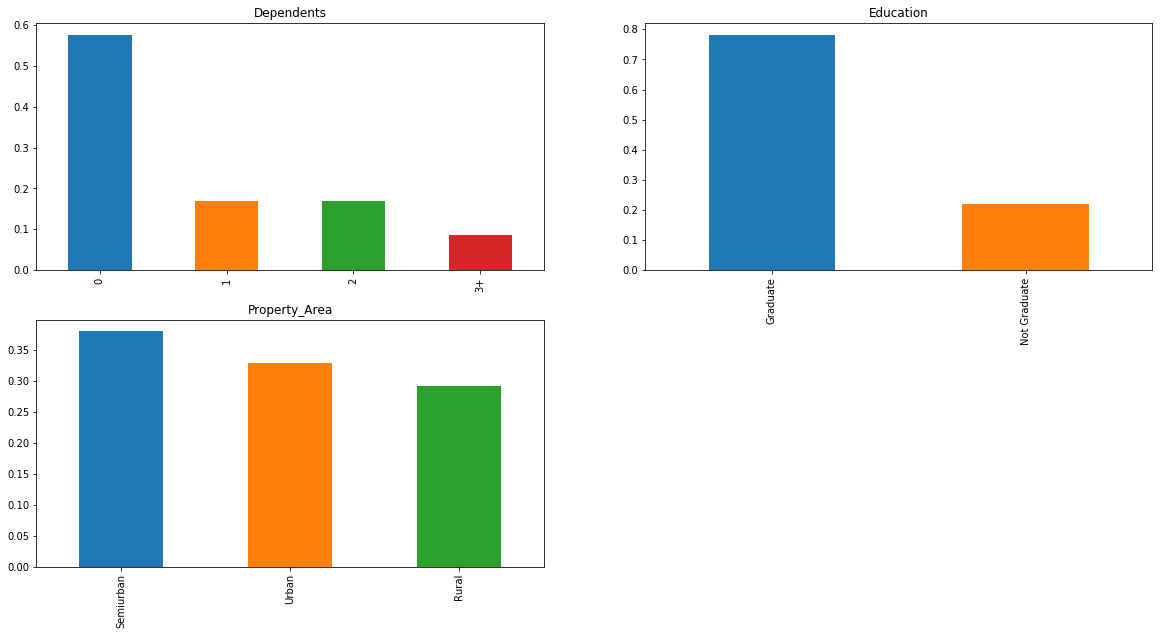

In [15]:
# lets visualize the ordinal variables
plt.figure(1)
plt.subplot(221)
train_df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Dependents')

plt.subplot(222)
train_df['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Education')

plt.subplot(223)
train_df['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Property_Area')

plt.show()

by looking at above plots we can understand that nearly 60% are having no dependents, 80% are graduated & 40% live in semiurban area

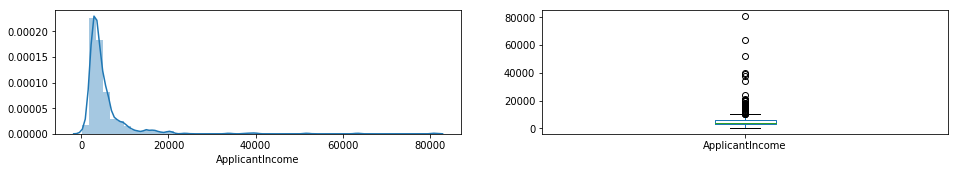

In [16]:
# lets visualize the numerical variables
plt.figure(1)
plt.subplot(221)
sns.distplot(train_df['ApplicantIncome'])

plt.subplot(222)
train_df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We can observe that most of the data in the distribution is to the left, which shows us it is not normally distributed and also the outliers might be because of the income varience

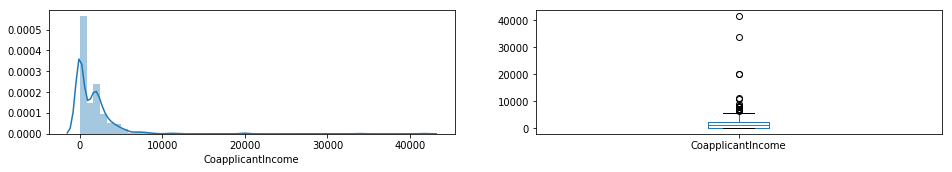

In [17]:
# Lets visualize the coapplicant income
plt.figure(1)
plt.subplot(221)
sns.distplot(train_df['CoapplicantIncome'])

plt.subplot(222)
train_df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We can observe the similar trend as in Applican Income, i.e., most of the coapplicant's income is between 0 to 5000. Outliers are also present and data is not normally distributed.

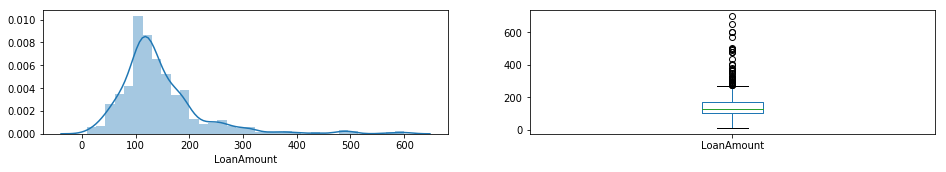

In [18]:
# Lets visualize the distribution of loan amount
plt.figure(1)
plt.subplot(221)
loandata = train_df.dropna()
sns.distplot(loandata['LoanAmount'])

plt.subplot(222)
train_df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We can observe the distribution is fairly done and also there are a lot of outliers

Now the Univariate Analysis is done, we will perform Bivariate Analysis

As we have looked at individual variable in Univariate now we will explore them with respect to target variable

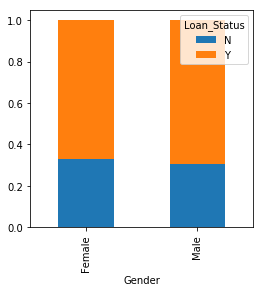

In [19]:
# Lets visualize the relation of Gender with loan status using the stacked bar that shows the proportion of the loan status
Gender = pd.crosstab(train_df['Gender'], train_df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It seems that male and female have equal proportion of loan status

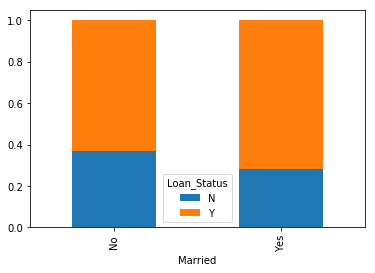

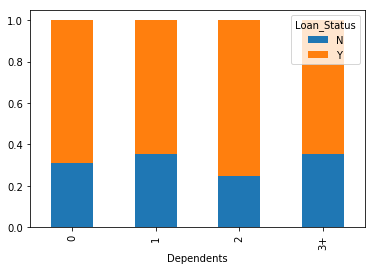

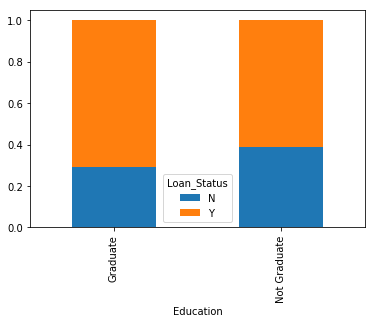

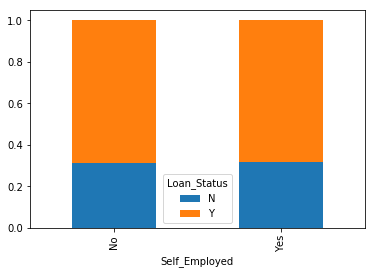

In [20]:
# Lets visualize remaining categorical variables with loan status
Married = pd.crosstab(train_df['Married'], train_df['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
plt.show()

Dependents=pd.crosstab(train_df['Dependents'],train_df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education=pd.crosstab(train_df['Education'],train_df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Self_Employed=pd.crosstab(train_df['Self_Employed'],train_df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.show()

Un married people are approved more loans  
People with 1 or 3+ dependents are approved equally  
Graduates are more likely to get their loan approved  
Employed or self-employed doestn't variate the loan approval status  

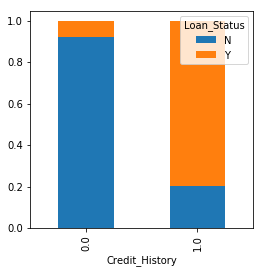

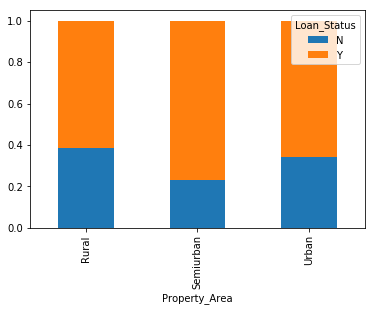

In [21]:
# Lets visualize the remaining categorical yetordinal variables aginst loan status
Credit_History = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area=pd.crosstab(train_df['Property_Area'],train_df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

People with credit history '1' are more likely to get their loan approved  
Loans approved mostly to the people who live in suburban area  

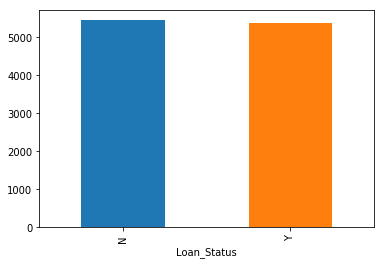

In [22]:
# Lets visualize numerical variable with respect to target variable
train_df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Looks like mean of income doesnt show any difference. So lets make bins of the applicant income and evaluate loan status for each bin

In [23]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train_df['Income_bin'] = pd.cut(loandata['ApplicantIncome'],bins,labels=group)

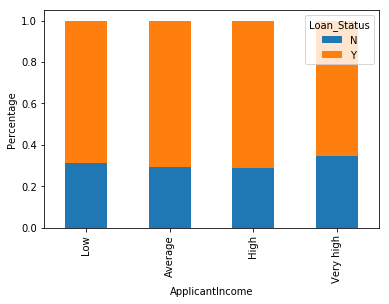

In [24]:
Income_bin=pd.crosstab(train_df['Income_bin'],train_df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

plt.show()

It shows that applicant income is effecting the loan status as assumed

In [25]:
# Lets visualize coapplicant income and lona status
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train_df['Coapplicant_Income_bin'] = pd.cut(loandata['CoapplicantIncome'],bins,labels=group)

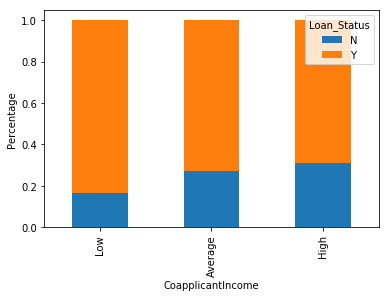

In [26]:
Coapplicant_Income_bin=pd.crosstab(train_df['Coapplicant_Income_bin'],train_df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

plt.show()

It shows that is coapplicant income is low, chances of loan approval is high which doesnt seem right. It looks so because most of the applicants doesnot have any coapplicants so the loan approval rate is high.  
So let us make a new variable by combining both applicant and coapplicant income and check the effectiveness on loan approval.

In [27]:
# Let us combine the applicant and coapplicant income
train_df['Total_Income'] = train_df['ApplicantIncome']+train_df['CoapplicantIncome']

In [28]:
bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'VeryHigh']
train_df['Total_Income_bin'] = pd.cut(train_df['Total_Income'],bins,labels=group) 

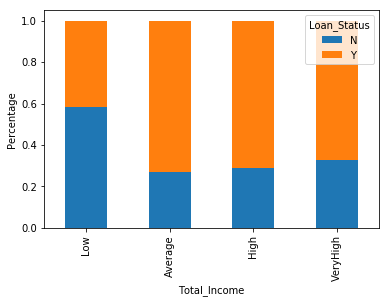

In [29]:
Total_Income_bin=pd.crosstab(train_df['Total_Income_bin'],train_df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

plt.show()

We can see that loan approval for Low income is very less compared to avreage, high and very high income.  
Now lets visualize the loan amount variable  

In [30]:
bins=[0,100,200,700]
group=['Low','Average','High']
train_df['LoanAmount_bin']=pd.cut(loandata['LoanAmount'],bins,labels=group)

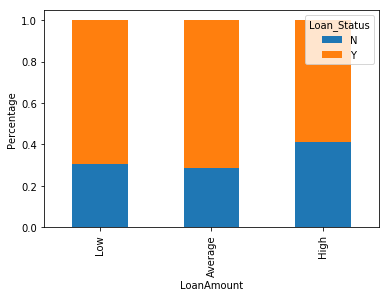

In [31]:
LoanAmount_bin=pd.crosstab(train_df['LoanAmount_bin'],train_df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

plt.show()

It shows that low and average loan amounts are approved compared to higher loan amounts which makes sense.  
Now lets drop the bins we created & compare the dependent variable with loan status.  
Now that the dependent variable is numerical, lets change the target variable also into numerical value as 'Y = 1' & 'N = 0'  
Also, dependent variable has '3+' value lets remove '+' and make it into '3' for our convinience  

In [32]:
train_df = train_df.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [33]:
train_df['Dependents'].replace('3+', 3,inplace=True)
test_df['Dependents'].replace('3+', 3,inplace=True)
train_df['Loan_Status'].replace('N', 0,inplace=True)
train_df['Loan_Status'].replace('Y', 1,inplace=True)

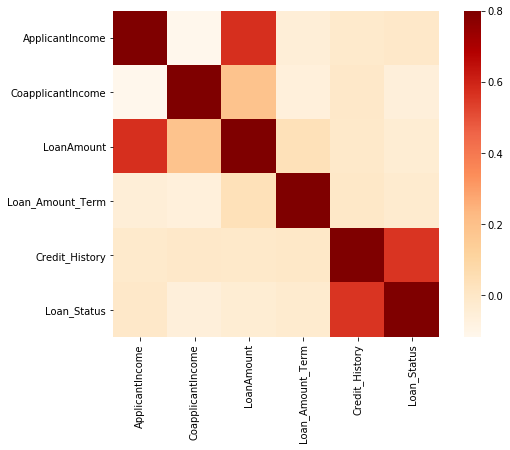

In [34]:
# Lets use 'Heatmaps' to visualize the correlation between the variables
matrix = train_df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="OrRd");

Now we have an idea of the variables effecting the loan status.  
Lets start data cleaning. Dealing with missing and outlier values  

In [35]:
# Lets first list out count of feature wise missing values
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Tersm, Credit_History  
Lets deal with all the features one by one

For numerical values we will fill by mean or median  
For categorical we use mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.  

In [36]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.  

In [37]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [38]:
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [39]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)

In [40]:
# Now lets check whether all the missing values are filled in the dataset
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [41]:
test_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
test_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
test_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)

# Outlier Treatment

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data.

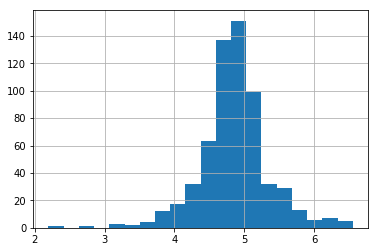

In [42]:
train_df['LoanAmount_log'] = np.log(train_df['LoanAmount'])
train_df['LoanAmount_log'].hist(bins=20)
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

# Model Building

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [43]:
train_df=train_df.drop('Loan_ID',axis=1)
test_df=test_df.drop('Loan_ID',axis=1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python  
Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [44]:
X = train_df.drop('Loan_Status',1)
Y = train_df.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.

Consider the “Gender” variable. It has two classes, Male and Female.  
As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.  
Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.  
Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.  

In [47]:
X=pd.get_dummies(X)
train_df=pd.get_dummies(train_df)
test_df=pd.get_dummies(test_df)

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.  

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size =0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [52]:
pred_cv = model.predict(x_cv)

Let us calculate how accurate our predictions are by calculating the accuracy.

In [53]:
accuracy_score(y_cv,pred_cv)

0.8

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.  

Let’s make predictions for the test dataset.

In [54]:
pred_test = model.predict(test_df)

Lets import the submission file which we have to submit on the solution checker

In [55]:
submission = pd.read_csv(r'Downloads/Sample_Submission_ZAuTl8O_FK3zQHh.csv')

We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.

In [56]:
submission['Loan_Status']=pred_test
submission['Loan_ID']= train_df_original['Loan_ID']

we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [57]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

Finally we will convert the submission to .csv format and make submission to check the accuracy

In [58]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

From this submission we got an accuracy of 0.7847  
nstead of creating validation set, we can also make use of cross validation to validate our predictions.  

# Logistic Regression using stratified k-folds cross validation

In [59]:
# import stratickfold from sklearn
from sklearn.model_selection import StratifiedKFold

In [91]:
# Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,Y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = Y[train_index],Y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test_df)
pred=model.predict_proba(xvl)[:,1]

results = model_selection.cross_val_score(model, X, Y, cv=kf)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164
Accuracy: 80.288% (1.936%)


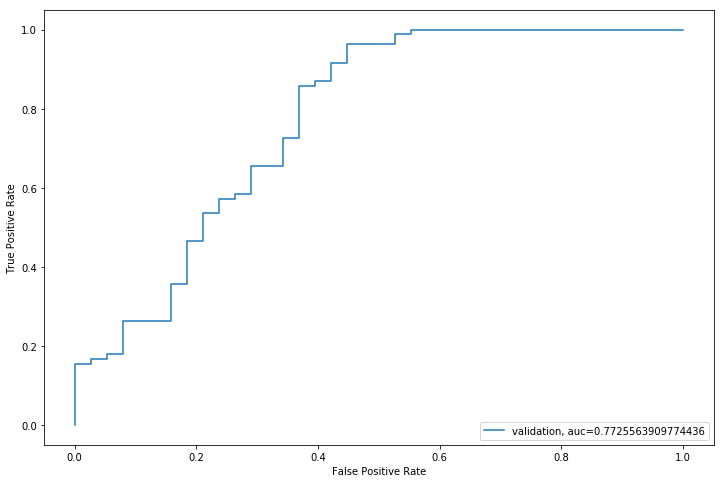

In [62]:
# Lets visualize the ROC curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

There is an accuracy of 77%

In [63]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_df_original['Loan_ID']

In [64]:
# We need predictions in Y and N. So let’s convert 1 and 0 to Y and N
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [65]:
# convert the submission to .csv format and make submission to check the accuracy on the leaderboard
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

There might also be other features that can effect the target variable. Lets create few features that might effect the target variable

In [67]:
# Total Income, EMI and Balance Amount can be effective features, so lets create them
train_df['Total_Income']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']
test_df['Total_Income']=test_df['ApplicantIncome']+test_df['CoapplicantIncome']

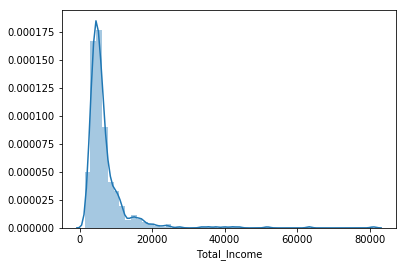

In [68]:
# Lets see how is it distributed
sns.distplot(train_df['Total_Income'])

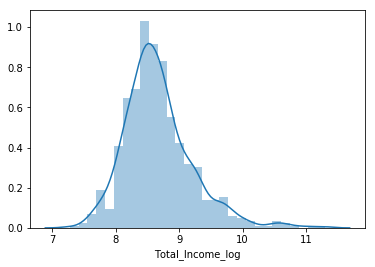

In [70]:
# It doesn't look like its equally distributed, lets apply log transformation and check
train_df['Total_Income_log'] = np.log(train_df['Total_Income'])
sns.distplot(train_df['Total_Income_log'])
test_df['Total_Income_log'] = np.log(test_df['Total_Income'])

In [72]:
# Lets create the EMI feature
train_df['EMI'] = train_df['LoanAmount']/train_df['Loan_Amount_Term']
test_df['EMI'] = test_df['LoanAmount']/test_df['Loan_Amount_Term']

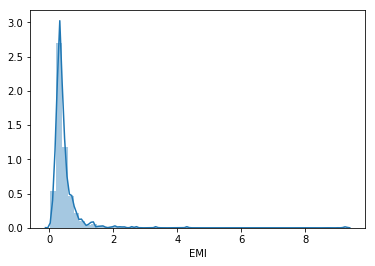

In [73]:
# Lets visualize how EMI is ditributed
sns.distplot(train_df['EMI'])

In [74]:
# Lets create Balance Amount feature
train_df['Balance_Amount'] = train_df['Total_Income']-(train_df['EMI']*1000)
test_df['Balance_Amount'] = test_df['Total_Income']-(test_df['EMI']*1000)

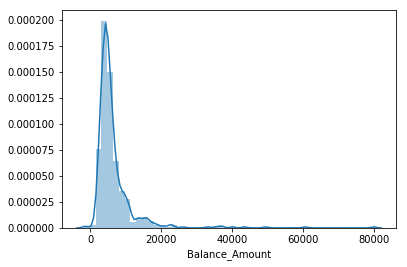

In [75]:
sns.distplot(train_df['Balance_Amount'])

In [77]:
# As we have created more effective features lets drop the other related variables to reduce the correlation between these features
train_df = train_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test_df = test_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# Model Building 
Now we have created few new features lets go ahead and build model and check for accuracy

In [78]:
# Lets save the target variable in seperate dataset
X = train_df.drop('Loan_Status',1)
Y = train_df.Loan_Status

# Logestic Regression

In [90]:
from sklearn import model_selection
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,Y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = Y[train_index],Y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test_df)
pred=model.predict_proba(xvl)[:,1]

results = model_selection.cross_val_score(model, X, Y, cv=kf)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8225806451612904

3 of kfold 5
accuracy_score 0.7786885245901639

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164
Accuracy: 80.288% (1.936%)


In [84]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_df_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [64]:
# We need predictions in Y and N. So let’s convert 1 and 0 to Y and N
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [85]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

As we can see, new feautures does not impact the results

# Decision Tree

In [92]:
from sklearn import tree
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,Y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = Y[train_index],Y[test_index]
    
     model = tree.DecisionTreeClassifier(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(test_df)

results = model_selection.cross_val_score(model, X, Y, cv=kf)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


1 of kfold 5
accuracy_score 0.7258064516129032

2 of kfold 5
accuracy_score 0.7419354838709677

3 of kfold 5
accuracy_score 0.7049180327868853

4 of kfold 5
accuracy_score 0.680327868852459

5 of kfold 5
accuracy_score 0.7049180327868853
Accuracy: 71.158% (2.093%)


As we can see the accuracy is much less than the logestic regression

In [93]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_df_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [94]:
# We need predictions in Y and N. So let’s convert 1 and 0 to Y and N
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [95]:
#  Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

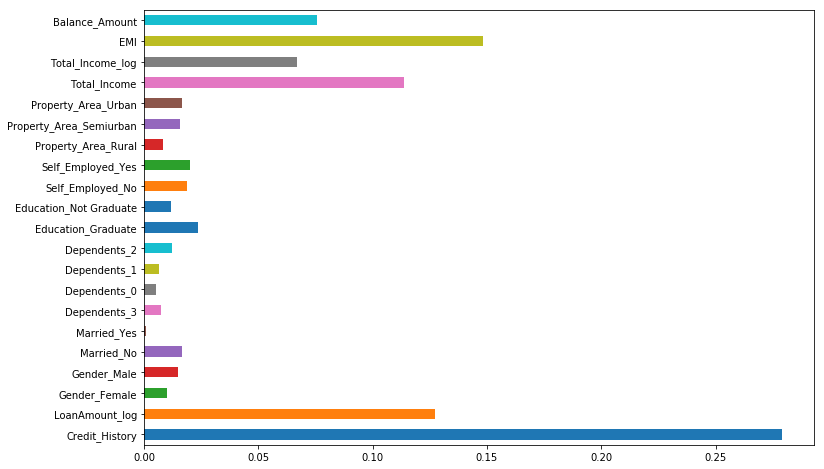

In [97]:
# Lets figureout which features contributes more to loan approval
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

# As we can see 'Credit History' makes huge impact of the loan approval compared to other features